# Linear Regression on Happiness Data

### Load Happiness Data from Kaggle

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
data= pd.read_csv("2017.csv")

In [66]:
data.shape

(155, 12)

In [67]:
data.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [68]:
data.columns

Index([u'Country', u'Happiness.Rank', u'Happiness.Score', u'Whisker.high',
       u'Whisker.low', u'Economy..GDP.per.Capita.', u'Family',
       u'Health..Life.Expectancy.', u'Freedom', u'Generosity',
       u'Trust..Government.Corruption.', u'Dystopia.Residual'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [70]:
# excluding columns Happiness.Rank, Whisker.high, Whisker.low
happy= data[['Country','Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]

### Distribution Plot of Happiness Score

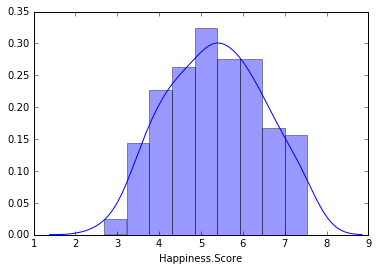

In [71]:
sns.distplot(happy['Happiness.Score'])

### Analyze Correlations between Variables

In [31]:
happy.corr()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Economy..GDP.per.Capita.,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia.Residual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


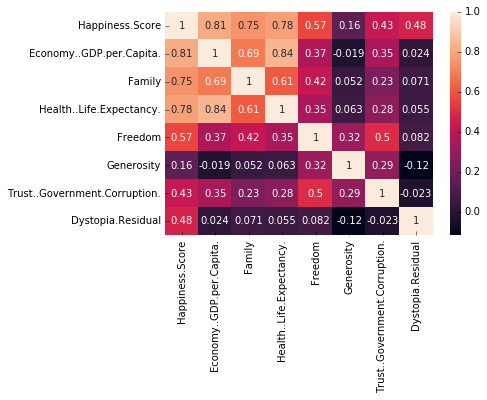

In [32]:
sns.heatmap(happy.corr(), annot=True)

In [33]:
happy.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### Lowest Correlation Coefficient between Happiness.Score and Generosity 

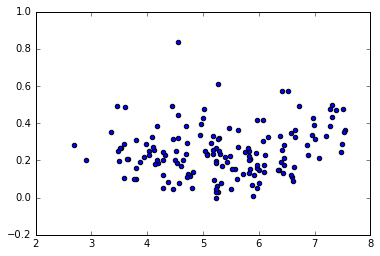

In [75]:
plt.scatter(happy['Happiness.Score'], happy['Generosity'])

#### Seaborn pairplot on all variables

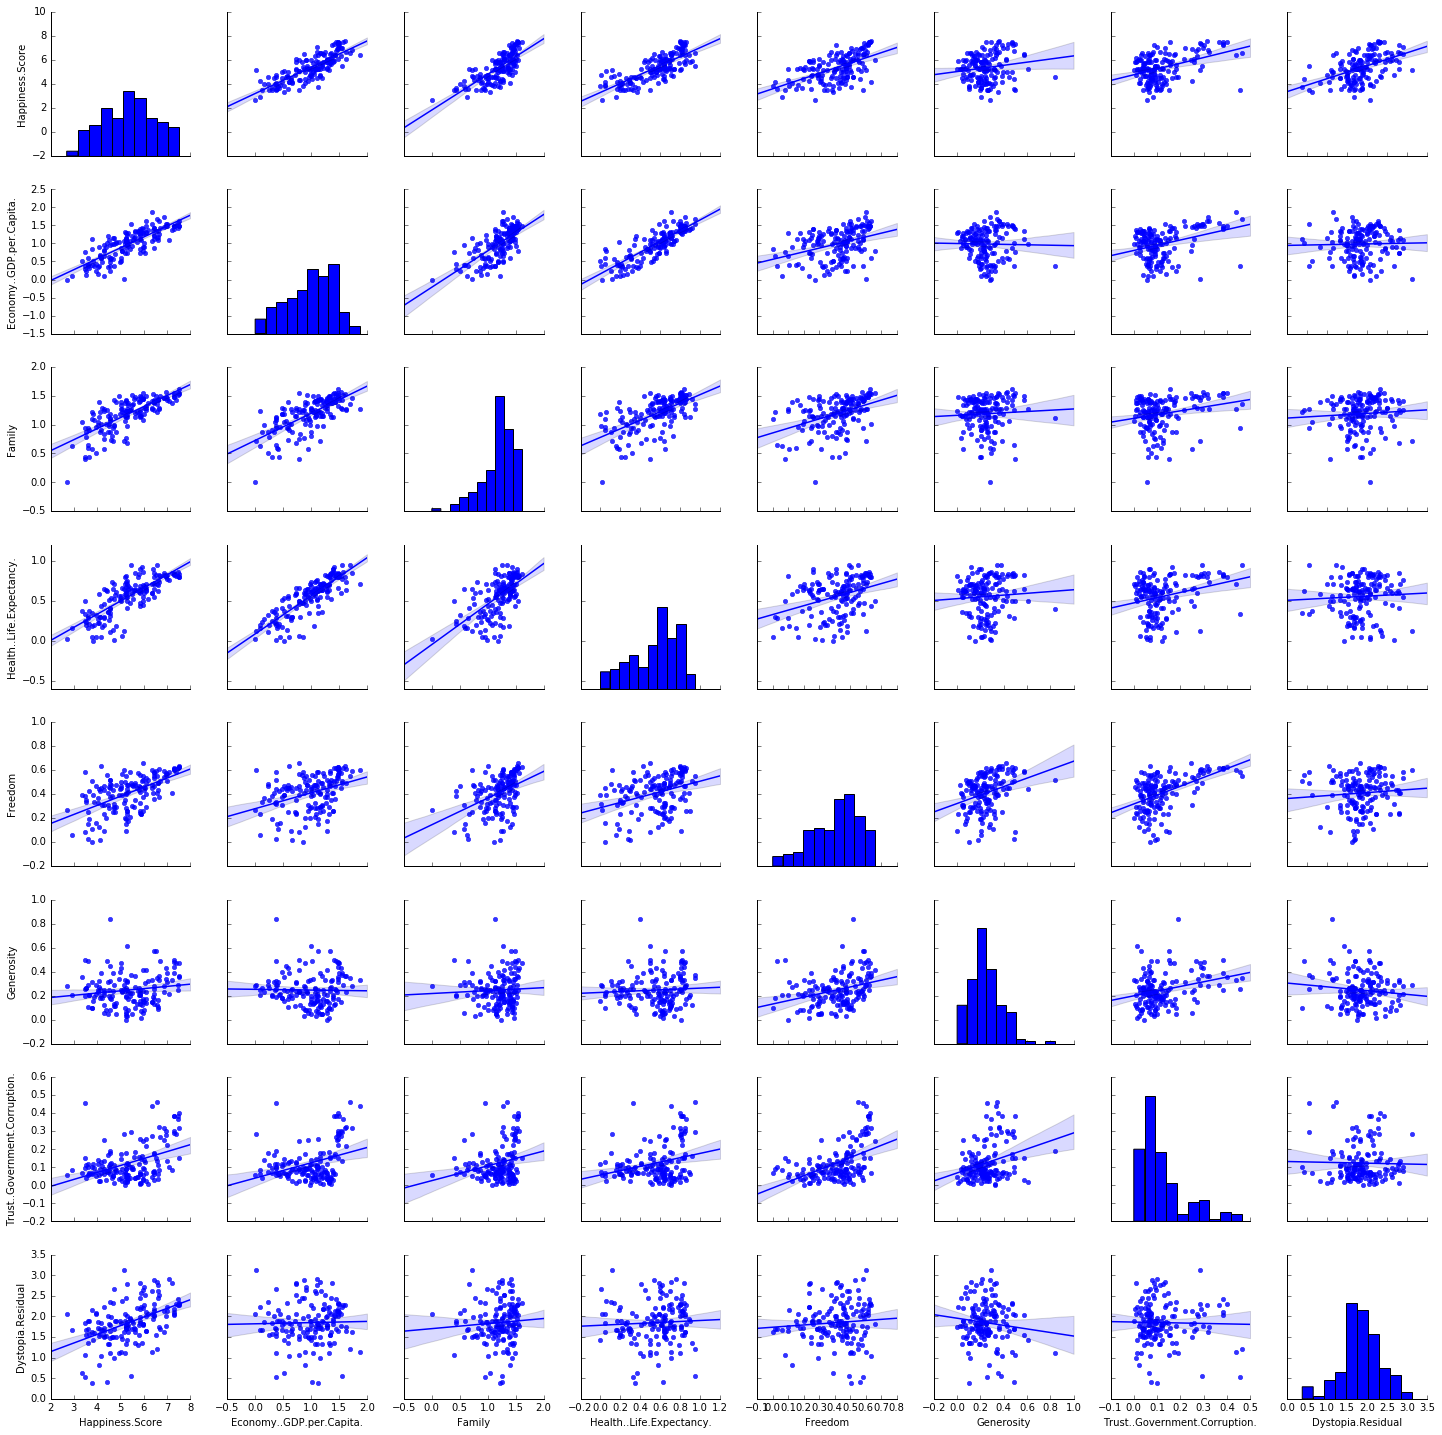

In [122]:
sns.pairplot(happy, kind="reg")

### Linear Regression Model

In [38]:
X= happy[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]

In [39]:
y= happy['Happiness.Score']

In [40]:
from sklearn.cross_validation import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=144)

In [53]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [54]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Economy..GDP.per.Capita.,1.000309
Family,0.999849
Health..Life.Expectancy.,0.999655
Freedom,1.000036
Generosity,1.000217
Trust..Government.Corruption.,0.999406
Dystopia.Residual,0.999956


In [56]:
predictions= lm.predict(X_test)

In [57]:
predictions

array([ 5.31054365,  6.86280401,  5.81863259,  7.2840226 ,  5.81046864,
        5.07402002,  5.2790956 ,  6.64810676,  5.90180562,  5.62905426,
        3.4705818 ,  5.17489968,  5.71532235,  3.59315928,  6.08731156,
        3.50658302,  3.53272415,  4.53477859,  4.5526752 ,  4.64424025,
        4.28003689,  4.16822135,  6.71398276,  6.5776225 ,  5.07414698,
        5.18245165,  4.69202943,  7.28360431,  4.18055732,  3.34915666,
        3.60307157,  5.75831808,  3.6437781 ,  5.33625828,  5.82201908,
        4.7137219 ,  5.96310297,  3.65690529,  5.32433582,  6.44158604,
        4.70947579,  5.23726923,  6.45372341,  6.10511564,  6.59858739,
        5.4715763 ,  2.9045204 ,  5.91988736,  3.96969587,  5.01062986,
        5.61149689,  6.35707461,  4.46565886,  7.31391577,  4.49695476])

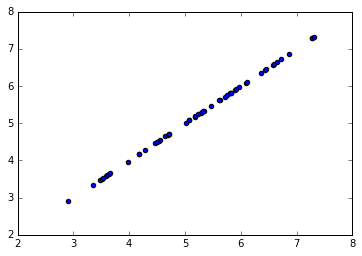

In [58]:
plt.scatter(y_test, predictions)

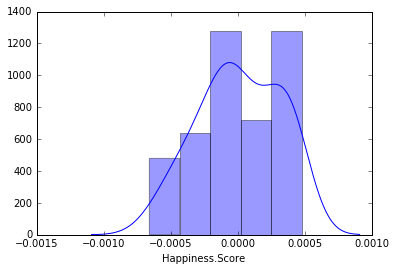

In [59]:
sns.distplot((y_test - predictions))

In [60]:
from sklearn import metrics

In [61]:
metrics.mean_absolute_error(y_test, predictions)

0.00025234888296497002

In [62]:
metrics.mean_squared_error(y_test, predictions)

9.0148422750402532e-08

In [63]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.00030024726934712085

## Introducing Population Density & Fertility Rates

In [86]:
data2= pd.read_csv('population.csv')

In [87]:
pop= data2[['Country', 'Density (P/Km2)', 'Fert Rate' ]]

In [103]:
happy2= pd.merge(left=happy, right=pop, on='Country')

In [104]:
happy2.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Density (P/Km2),Fert Rate
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,15,1.8
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,136,1.7
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,3,2
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,216,1.5
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,18,1.8


In [110]:
happy2['Density (P/Km2)']= happy2['Density (P/Km2)'].str.replace(',', '')

happy2[['Density (P/Km2)', 'Fert Rate']] = happy2[['Density (P/Km2)', 'Fert Rate']].apply(pd.to_numeric, axis=1)

In [112]:
happy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 11 columns):
Country                          152 non-null object
Happiness.Score                  152 non-null float64
Economy..GDP.per.Capita.         152 non-null float64
Family                           152 non-null float64
Health..Life.Expectancy.         152 non-null float64
Freedom                          152 non-null float64
Generosity                       152 non-null float64
Trust..Government.Corruption.    152 non-null float64
Dystopia.Residual                152 non-null float64
Density (P/Km2)                  152 non-null float64
Fert Rate                        152 non-null float64
dtypes: float64(10), object(1)
memory usage: 14.2+ KB


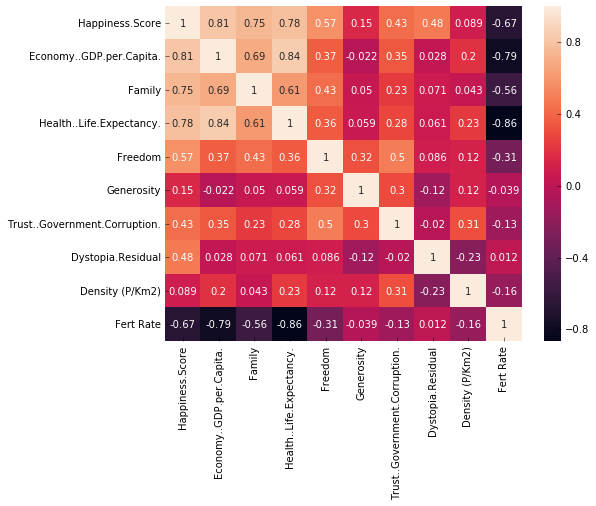

In [124]:
plt.figure(figsize= (8,6))
sns.heatmap(happy2.corr(), annot=True)

#### Contrary to my hypothesis that population density will be negatively correlated with happiness score, data shows almost no correlation 

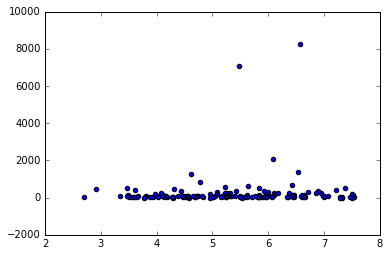

In [114]:
plt.scatter(happy2['Happiness.Score'], happy2['Density (P/Km2)'])

#### Another oberservation is that Fertility Rate is negatively correlated with the Happiness Score.. Which is interesting because Family and Happiness Score are positively correlated 🤔

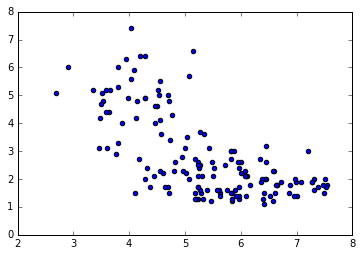

In [118]:
plt.scatter(happy2['Happiness.Score'], happy2['Fert Rate'])

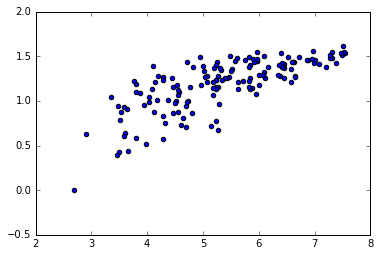

In [119]:
plt.scatter(happy2['Happiness.Score'], happy2['Family'])

In [125]:
X2= happy2[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Density (P/Km2)', 'Fert Rate']]
y2= happy2['Happiness.Score']

In [127]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.35, random_state=144)

In [128]:
lm.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
cdf = pd.DataFrame(lm.coef_, X2.columns, columns=['Coeff'])
cdf

,Coeff
Economy..GDP.per.Capita.,1.000359e+00
Family,9.996820e-01
Health..Life.Expectancy.,9.996527e-01
Freedom,1.000173e+00
Generosity,1.000301e+00
Trust..Government.Corruption.,9.993834e-01
Dystopia.Residual,1.000001e+00
Density (P/Km2),3.059864e-08
Fert Rate,1.665808e-05


In [130]:
predictions2= lm.predict(X_test2)

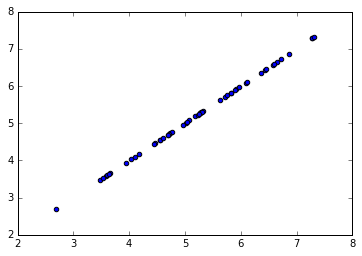

In [131]:
plt.scatter(y_test2, predictions2)

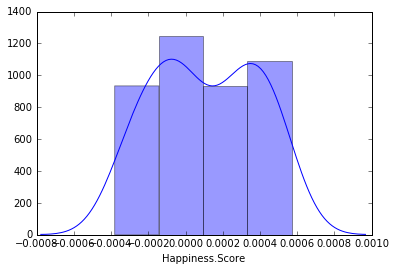

In [132]:
sns.distplot((y_test2 - predictions2))